#Problem Statement
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics. product by developing appropriate tables and charts.

In [4]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading the dataset
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#Exploratory Analysis

In [6]:
# Shape of the dataset -
df.shape

(180, 9)

In [7]:
# Checking data types -
df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


In [8]:
# Checking for null values
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [9]:
# Checking number of unique values in each column
for i in df.columns:
  print(i, ':', df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [11]:
df.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


**Checking value counts for categorical columns**

In [12]:
df['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [13]:
df['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [14]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [15]:
df['Education'].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


In [16]:
df['Usage'].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [17]:
df['Fitness'].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


In [18]:
# A broader look at correlation between the columns of dataframe
df_copy=df.copy()

df_copy['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)

df_copy['MaritalStatus'].replace(['Single', 'Partnered'], [0, 1], inplace=True)

df_copy['Product'].replace(['KP281', 'KP481', 'KP781'], [0, 1, 2], inplace=True)

df_copy.corr()

<ipython-input-18-a9cc884dc188>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)
<ipython-input-18-a9cc884dc188>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)
<i

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.032225,0.230653,0.495018,-0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.032225,1.000000,0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.230653,0.027544,1.000000,0.094089,-0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.495018,0.280496,0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,-0.017602,0.192152,-0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.537447,0.015064,0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.594883,0.061105,0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.624168,0.513414,0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.571596,0.036618,0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


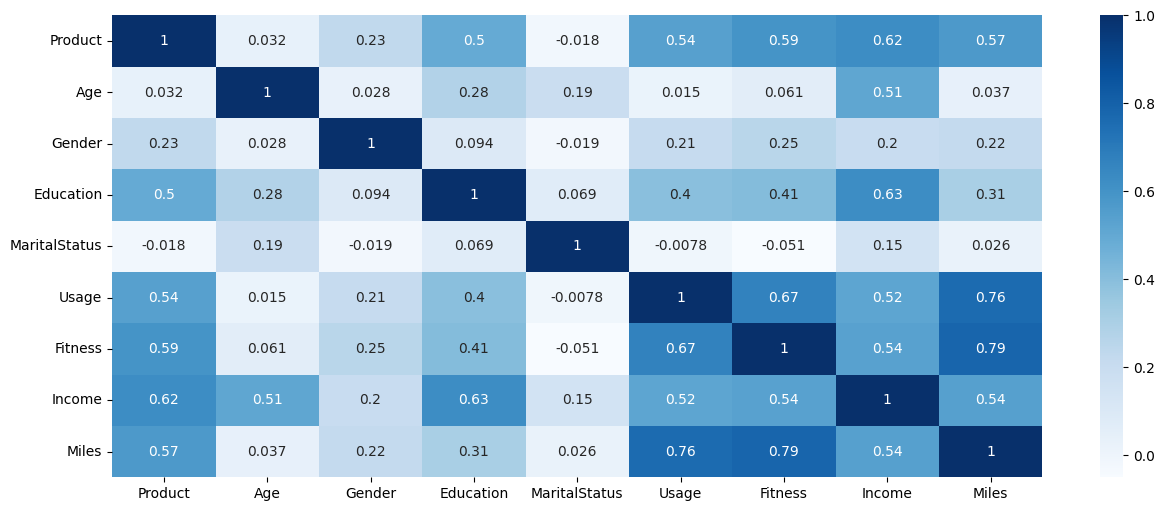

In [19]:
# Correlation Plot above as a Heatmap -

plt.figure(figsize=(15,6))
sns.heatmap(df_copy.corr(), cmap="Blues", annot=True)
plt.show()

#Key Insights
* The product or treadmill purchased shows a strong correlation with Education, Income, Usage, Fitness, and Miles.
* Age has a significant correlation with Income (0.51), which is reasonable. It also correlates with Education and Marital Status, which aligns with expectations.
* Gender is moderately correlated with Usage, Fitness, Income, and Miles.
* Education correlates with Age and Miles and has a strong correlation with Income (as anticipated). It also shows a meaningful relationship with Usage and Fitness.
* Marital Status exhibits some correlation with both Income and Age, as expected.
* Usage is highly correlated with Fitness and Miles, and it also has a strong positive correlation with Income.
#Additional Observations and Insights:
* Product, Fitness, Usage, and Miles are strongly interrelated, which aligns with expectations since increased usage likely results in more miles run, leading to improved fitness levels.
* A plausible narrative is that Age and Education primarily influence Income, which in turn impacts the type of product purchased. More advanced products tend to have higher usage, leading to more miles run and subsequently improved fitness.

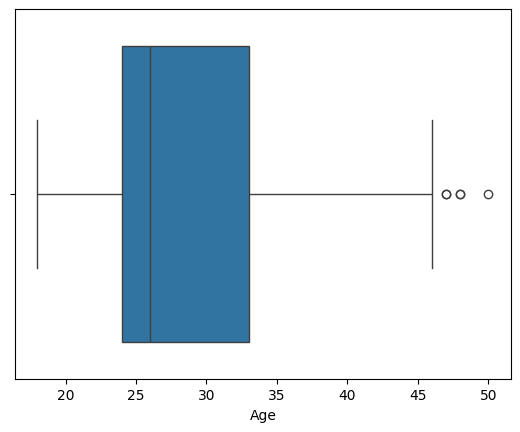

In [20]:
ax = sns.boxplot(x=df["Age"])
plt.show()

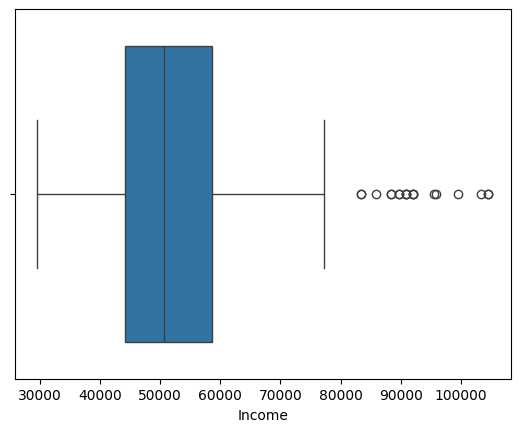

In [21]:
ax = sns.boxplot(x=df["Income"])
plt.show()

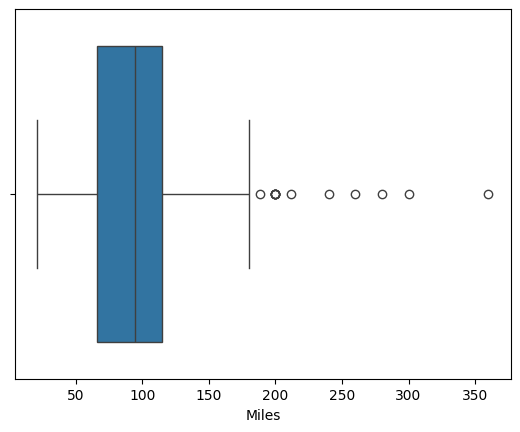

In [22]:
ax = sns.boxplot(x=df["Miles"])
plt.show()

There are undoubtedly outliers in the dataset. Removing them would result in a loss of information, especially given the small dataset size of only 180 rows. Therefore, instead of removing the outliers, they will be clipped to fall within the range of the 5th and 95th percentiles.

In [23]:
# Outlier Treatment
num_cols=['Age', 'Income', 'Miles']
for col in num_cols:
    percentiles = df[col].quantile([0.05,0.95]).values
    df_copy[col] = np.clip(df_copy[col], percentiles[0], percentiles[1])

#Graphical Analysis of Continious Variables

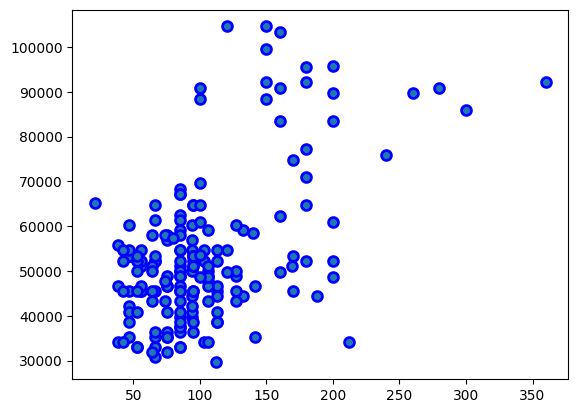

In [24]:
# Relationship between Miles and Income

plt.scatter(df['Miles'], df['Income'],
            linewidths = 2,
            marker ="o",
            edgecolor ="blue",
            s = 50)

The miles run on treadmill increase significantly with income, infact only people having incomes above 70000 have run over 220 miles.

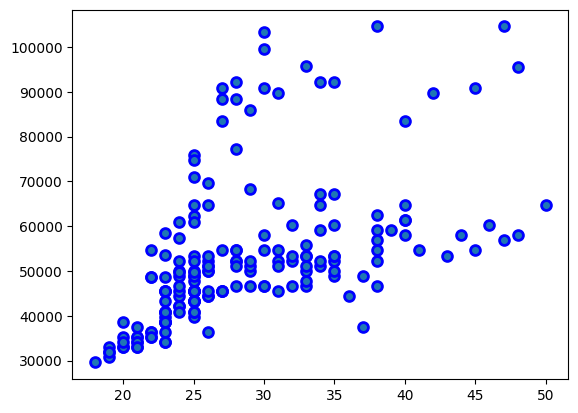

In [25]:
# Relationship between Age and Income

plt.scatter(df['Age'], df['Income'],
            linewidths = 2,
            marker ="o",
            edgecolor ="blue",
            s = 50)

The variance of income in lower ages is smaller as compared to the variance in higher ages.

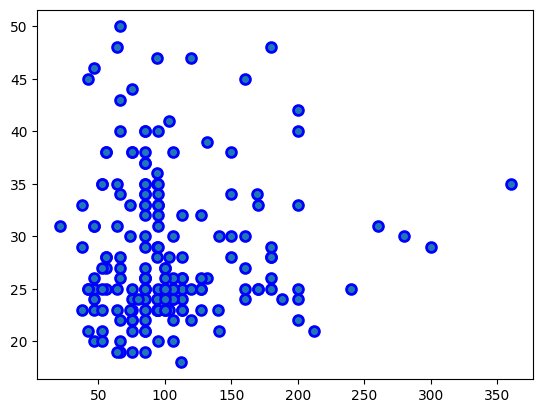

In [26]:
# Relationship between Age and Miles

plt.scatter(df['Miles'], df['Age'],
            linewidths = 2,
            marker ="o",
            edgecolor ="blue",
            s = 50)


There is no notable pattern or relationship between Age and the Miles run on a treadmill, as also indicated by the heatmap showing a correlation of 0.037.

# Analysis on the Basis of Product Types

<ipython-input-27-fd9a06e83734>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], hist=True, kde=True,


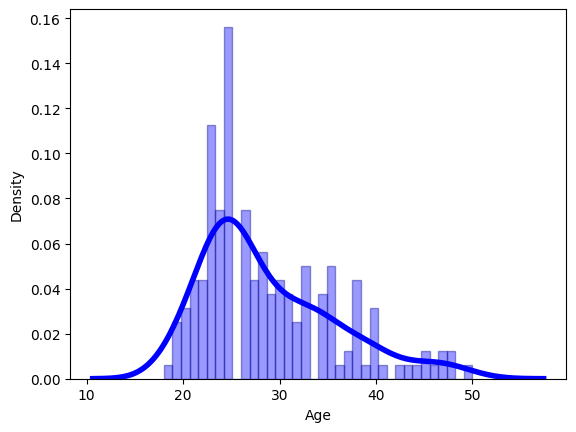

In [27]:
# Observing the ages to create bins -

sns.distplot(df['Age'], hist=True, kde=True,
bins=int(36), color = 'blue',
hist_kws={'edgecolor':'darkblue'},
kde_kws={'linewidth': 4})
plt.show()

In [28]:
# Creating bins on intervals of 5 as age gaps and below 20, above 40 -

bins = [-1,20,25,30,35,40,55]
labels = ['<20','20-25','25-30','30-35','35-40','40+']
df['Age_bins'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20
1,KP281,19,Male,15,Single,2,3,31836,75,<20
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20
3,KP281,19,Male,12,Single,3,3,32973,85,<20
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20


<ipython-input-29-f660bc3f555d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], hist=True, kde=True,


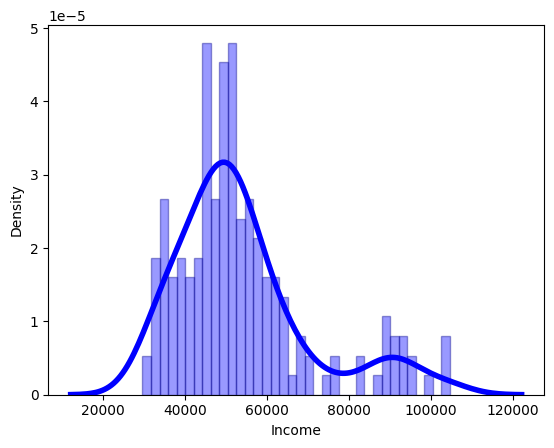

In [29]:
# Observing the incomes to create bins -

sns.distplot(df['Income'], hist=True, kde=True,
bins=int(36), color = 'blue',
hist_kws={'edgecolor':'darkblue'},
kde_kws={'linewidth': 4})
plt.show()

In [30]:
# Creating bins for income -

bins = [-1,35000,45000,50000,60000,70000,90000,120000]
labels = ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','70000-90000','90000+']
df['Income_bins'] = pd.cut(df['Income'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000


<ipython-input-31-8ecd91fadfe6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Miles'], hist=True, kde=True,


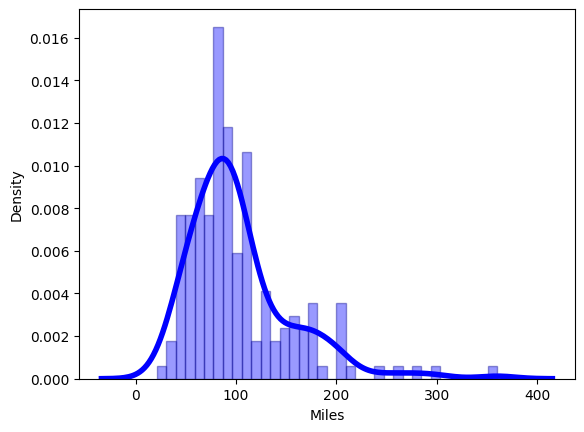

In [31]:
# Observing the miles to create bins -

sns.distplot(df['Miles'], hist=True, kde=True,
bins=int(36), color = 'blue',
hist_kws={'edgecolor':'darkblue'},
kde_kws={'linewidth': 4})
plt.show()

In [32]:
# Creating bins for miles -

bins = [-1,50,100,150,400]
labels = ['<50','50-100','100-150','150+']
df['Mile_bins'] = pd.cut(df['Miles'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50


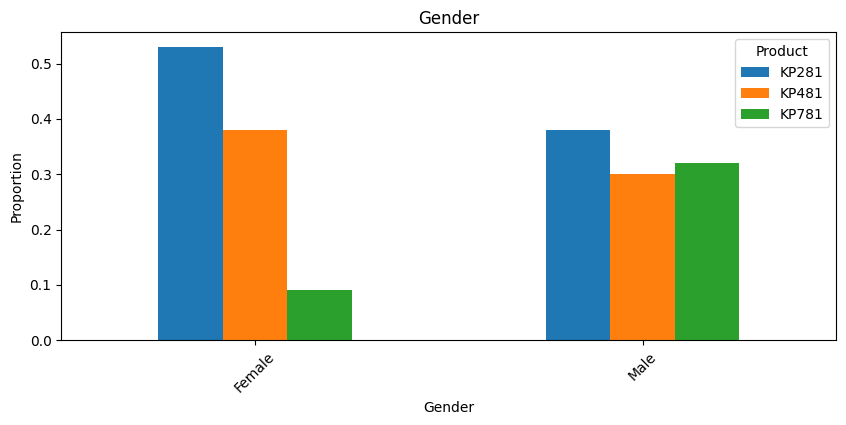

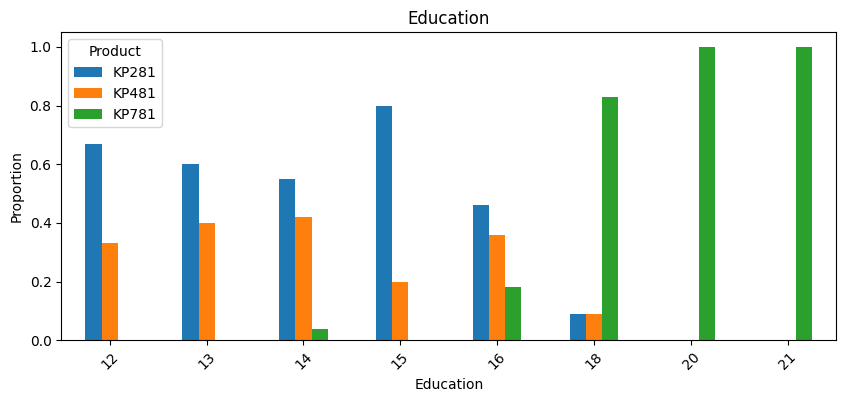

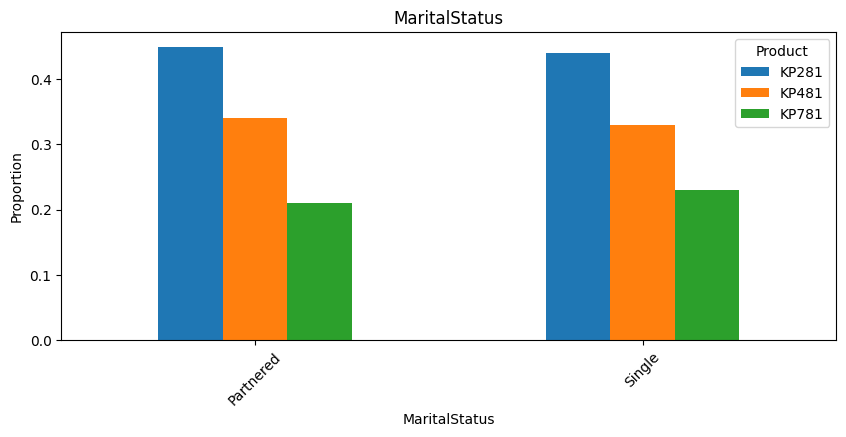

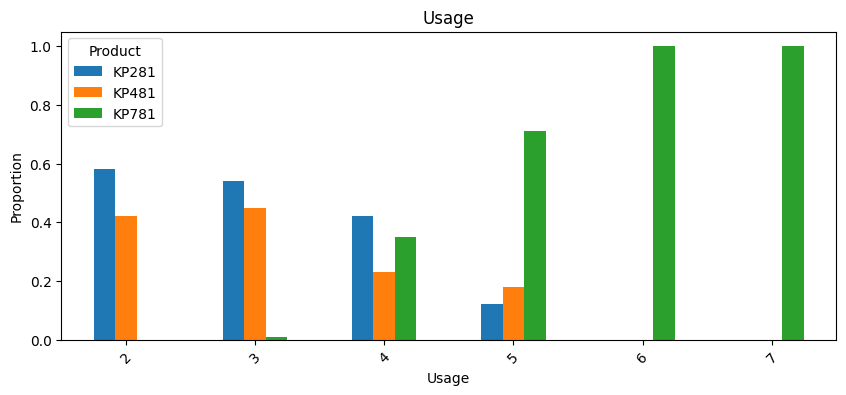

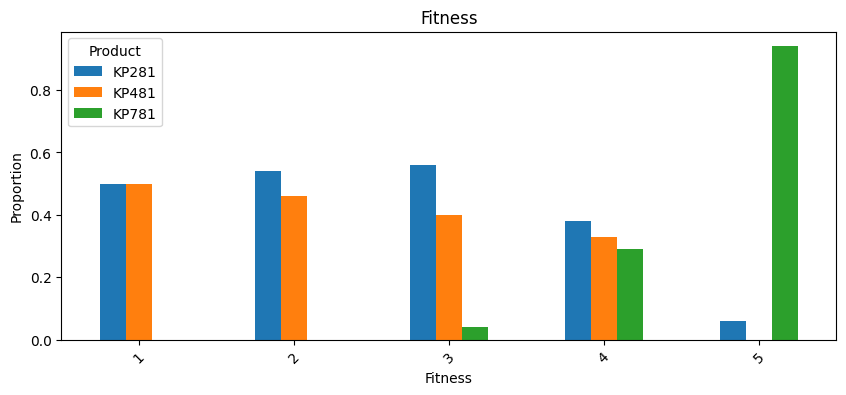

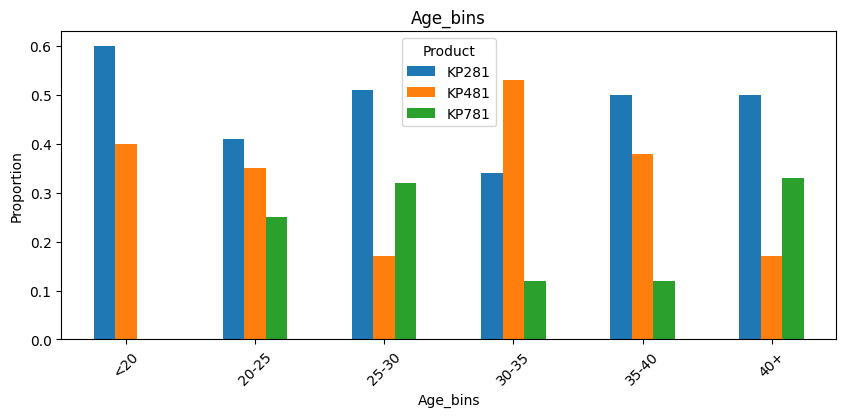

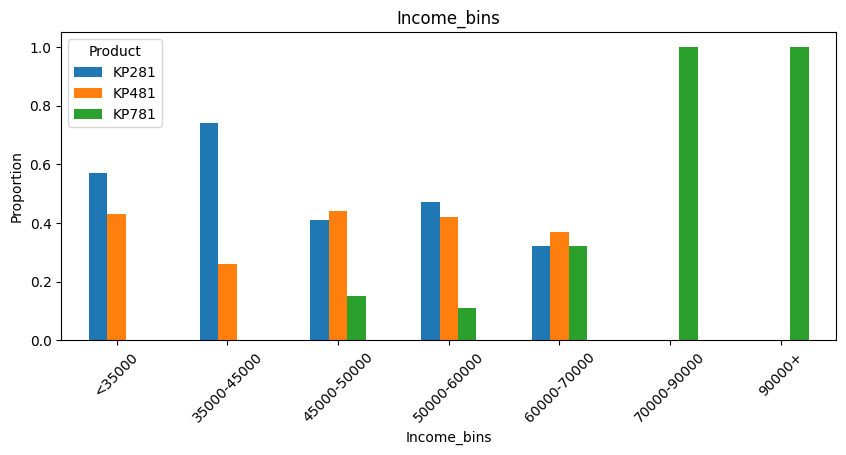

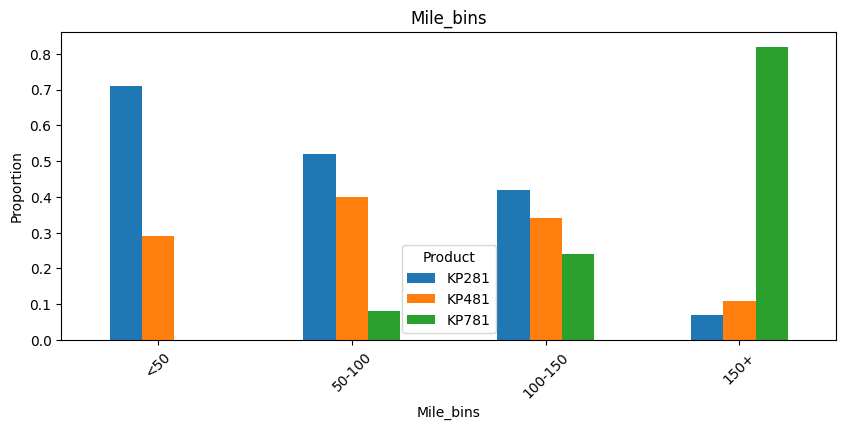

In [35]:
# Crosstabs -

cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_bins','Income_bins','Mile_bins']
for i in cat_cols:
    other= round(pd.crosstab(df[df[i].notnull()][i], df['Product']).\
                 div(pd.crosstab(df[df[i].notnull()][i],df['Product']).apply(sum,1),0),2)
    ax = other.plot(kind ='bar', title = i, figsize = (10,4))
    ax.set_xlabel(i)
    ax.set_ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

**Observations on the basis of above Categorical Plots**

1. Around 55% of women prefer KP281 and only 10% prefer KP781. While around 35% of men prefer KP781.

2. 80% in Eduation level of 18 and everyone in Education levels of 20 or 21 use KP781 while below 14 level, no one uses KP781.

3. Marital Status implies no significant information on the usages of different treadmills.

4. Those who workout 6 or 7 days a week use KP781 while 60% of those who workout 5 days a week use KP781.

5. 95% of customers having fitness level of 5 use KP781 and none of those having fitness level below 3 use KP781.

6. No one below 20 years of age use KP781.

7. Above 70000 units of Income, people only use KP781 while in Incomes below 45000, no one uses KP781.

8. Almost 80% of people who run over 200 miles and those who run above 150 miles use KP781 and no one who runs below 50 miles use KP781. The usage of KP281 decreases with the increase in miles while that of KP781 increases with the increase in miles.

In [37]:
for i in cat_cols:
  print('Table for',str(i),'vs Treadmill Product')
  display(pd.crosstab(df[i], df['Product'], margins=True, normalize='index'))
  print("\n")

Table for Gender vs Treadmill Product


Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222




Table for Education vs Treadmill Product


Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for MaritalStatus vs Treadmill Product


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222




Table for Usage vs Treadmill Product


Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Fitness vs Treadmill Product


Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484
All,0.444444,0.333333,0.222222




Table for Age_bins vs Treadmill Product


Product,KP281,KP481,KP781
Age_bins,,,
<20,0.600000,0.400000,0.000000
20-25,0.405797,0.347826,0.246377
25-30,0.512195,0.170732,0.317073
30-35,0.343750,0.531250,0.125000
35-40,0.500000,0.375000,0.125000
40+,0.500000,0.166667,0.333333
All,0.444444,0.333333,0.222222




Table for Income_bins vs Treadmill Product


Product,KP281,KP481,KP781
Income_bins,,,
<35000,0.571429,0.428571,0.000000
35000-45000,0.742857,0.257143,0.000000
45000-50000,0.411765,0.441176,0.147059
50000-60000,0.472727,0.418182,0.109091
60000-70000,0.315789,0.368421,0.315789
70000-90000,0.000000,0.000000,1.000000
90000+,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Mile_bins vs Treadmill Product


Product,KP281,KP481,KP781
Mile_bins,,,
<50,0.705882,0.294118,0.000000
50-100,0.515464,0.402062,0.082474
100-150,0.421053,0.342105,0.236842
150+,0.071429,0.107143,0.821429
All,0.444444,0.333333,0.222222


**Brief depiction of Probabilities Inferred from the above tables**

1. In all the tables, one can see the last row named All, it consists of the overall probabilities of purchases of those 3 treadmills, i.e. - Probability of purchase of KP281= 44.44%, KP481= 33.33% and KP781=22.22%

2. P(KP281|Education=12) = 66.66% and P(KP781|Education=18) = 82.6% P(KP781|Education=20) = P(KP781|Education=21) = 100%

3. P(KP281|Usage=2) = 57.57%, P(KP781|Usage=6)=P(KP781|Usage=7) = 100%

4. P(KP481|Fitness=2) = 46.15%

5. P(KP481|Age_bins=30-35) = 53.12%

6. P(KP781|Income>70000) = 100% and P(KP481|Income_bins=45000-50000) = 44.11%

7. P(KP281|Mile_bins<50) = 70.5% and P(KP781|Mile_bins>150)=82.1%

# Customer Profilinng and Recommendations
**Customer Profiles-KP781:**

1. Individuals with incomes exceeding 70k have run over 220 miles, and all of them exclusively use the KP781 treadmill.
2.Recommend KP781 to individuals with an income above 70k if they meet criteria like high education levels, frequent usage, top fitness levels, or running over 150 miles (80% of these users prefer KP781).
3.Avoid recommending KP781 to individuals with low education, poor fitness levels, young age, low income, or minimal mileage (less than 50 miles).
4.Only two women have incomes exceeding 70k, which likely explains why most women have not opted for the KP781 due to affordability constraints.

* It is worth noting that KP281 and KP481 are similar in cost and customer characteristics. However, some differences have been identified, but further validation with additional data is needed.

**Customer Profiles-KP481:**

1. Women having incomes below 70k and age between 32-37
2. Customers with age < 25, incomes in range 50-60k and the miles run is in the range 100-150
3. Customers with Fitness=4, age in range 25-32 and income 50k-60k
4. Customers with Education Level=16, Age< 22 and income 45k-50k
5. Customers with Education Level=16, Age< 35 and income 60k-70k
6. Customers with 35-40 Age and 60k-70k income
7. Women with incomes < 35k and whose miles run >105
8. Men with incomes 60k-70k and who tread in range 100-150 miles
9. Customers with Fitness=4, incomes < 45k-50k and who run more than 100 miles
10. Customers with Education level=13 having incomes in ranges 45-60k
11. Customers with Usages=2 and Age>40

**Customer Profiles-KP281:**

1. Women having incomes below 70k and age > 40
2. Customers having income in range 60k-70k and usage days=3
3. Customers having income in range 45k-50k and usage days=2
4. Customers having income in range 35k-45k and usage days=4
5. Customers having income in range 50k-60k and usage days=4
6. Customers with Fitness=4, age closer to 40 and income 50k-60k
7. Customers with Education Level=16, Age>32 and income 45k-50k
8. Customers with Education Level=16, Age>45 and income 60k-70k
9. Customers with Age in 25-30 and 35-40 having incomes in range 35k-45k
10. Customers with 40+ Age and 60k-70k income
11. Women with incomes < 35k and whose miles run < 105
12. Customers with usages=5, incomes in range 35k-45k and who run more than 140 miles
13. Customers with Fitness=5, incomes < 70k and Incomes in 45k-50k
14. Customers with Education level=15 having incomes less than 35k
15. Customers with Usages=3, miles run < 70 and Age>40
16. Customers with Usages=2 and Age between 25-30